In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer


# Load the data

train_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

# Check data types and missing values




In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [4]:
train_data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [7]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [8]:
train_data['Education'].value_counts()

Others           3726
Graduate         3691
Diploma          3653
Not Specified    3525
Name: Education, dtype: int64

In [9]:
floating = train_data.select_dtypes(include='float')
obj = train_data.select_dtypes(include='object')

In [10]:
floatingt = test_data.select_dtypes(include='float')
objt = test_data.select_dtypes(include='object')

In [11]:
floating=pd.DataFrame(floating)
obj=pd.DataFrame(obj)

In [12]:
floatingt=pd.DataFrame(floatingt)
objt=pd.DataFrame(objt)

In [13]:
floating.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,4.0,1.0,9.0,3.0,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3.0,2.0,2.0,4.0,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3.0,3.0,1.0,4.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,2.0,4.0,3.0,3.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,1.0,2.0,1.0,5.0,1.0


In [14]:
floating.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
WeekendPurchase                    121
dtype: int64

In [15]:
floatingt.isnull().sum()

HomePage                           51
HomePage_Duration                  55
LandingPage                        56
LandingPage_Duration               75
ProductDescriptionPage             58
ProductDescriptionPage_Duration    63
GoogleMetric:Bounce Rates          66
GoogleMetric:Exit Rates            51
GoogleMetric:Page Values           45
SeasonalPurchase                   45
OS                                 62
SearchEngine                       58
Zone                               47
Type of Traffic                    68
WeekendPurchase                    58
dtype: int64

In [16]:
# t0=KNNImputer(n_neighbors=10)
t0=SimpleImputer(strategy='most_frequent')
floating=t0.fit_transform(floating)
floatingt=t0.transform(floatingt)
floating=pd.DataFrame(floating)
floatingt=pd.DataFrame(floatingt)

In [17]:
floating.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [18]:
floatingt.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [19]:
t00=SimpleImputer(strategy='most_frequent')
obj=t00.fit_transform(obj)
objt=t00.transform(objt)
obj=pd.DataFrame(obj)
objt=pd.DataFrame(objt)

In [20]:
now=pd.concat([floating,obj],axis=1)
nowt=pd.concat([floatingt,objt],axis=1)

In [21]:
now.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
0     0
1     0
2     0
3     0
4     0
5     0
dtype: int64

In [22]:
nowt.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
0     0
1     0
2     0
3     0
4     0
5     0
dtype: int64

In [23]:
now.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Other
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Married
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,1.0,Feb,Returning_Visitor,Female,ALL,Others,Married
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,0.0,Feb,Returning_Visitor,Male,ALL,Diploma,Single
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,1.0,Feb,Returning_Visitor,Male,Deny,Diploma,Other


In [24]:
y_train = train_data['Made_Purchase']
del train_data['Made_Purchase']

In [25]:
now.columns=['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'WeekendPurchase',
        'OS', 'SearchEngine', 'Zone',
       'Type of Traffic','Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']

In [26]:
nowt.columns=['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'WeekendPurchase',
        'OS', 'SearchEngine', 'Zone',
       'Type of Traffic','Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status']

In [27]:
train_data.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

In [28]:
now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  float64
 10  WeekendPurchase                  14731 non-null  float64
 11  OS                               14731 non-null  float64
 12  SearchEngine      

In [29]:
now.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Other
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Married
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,1.0,Feb,Returning_Visitor,Female,ALL,Others,Married
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,0.0,Feb,Returning_Visitor,Male,ALL,Diploma,Single
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,1.0,Feb,Returning_Visitor,Male,Deny,Diploma,Other


In [30]:
trns= ColumnTransformer(transformers=[('t1',OrdinalEncoder(categories=[['Others','Not Specified','Diploma','Graduate']]),['Education']),('t2',OneHotEncoder(sparse=False,drop='first'),['Month_SeasonalPurchase','CustomerType','Gender', 'Cookies Setting','Marital Status' ])],remainder='passthrough')

In [31]:
now['Marital Status'].value_counts()

Other      5082
Single     4919
Married    4730
Name: Marital Status, dtype: int64

In [32]:
nowt['Marital Status'].value_counts()

Other      2267
Single     2170
Married    2162
Name: Marital Status, dtype: int64

In [33]:
nowt.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Single
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,1.0,2.0,0.0,Feb,Returning_Visitor,Not Specified,ALL,Graduate,Married
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,1.0,3.0,0.0,Feb,Returning_Visitor,Female,Required,Diploma,Other
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Required,Graduate,Other
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,4.0,3.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Other


In [34]:
unew=pd.concat([now,y_train],axis=1)

In [35]:
unew.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,9.0,3.0,0.0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Other,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,4.0,0.0,Feb,Returning_Visitor,Female,Deny,Others,Married,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,1.0,4.0,1.0,Feb,Returning_Visitor,Female,ALL,Others,Married,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,3.0,3.0,0.0,Feb,Returning_Visitor,Male,ALL,Diploma,Single,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,5.0,1.0,Feb,Returning_Visitor,Male,Deny,Diploma,Other,False


In [36]:
unew['Made_Purchase'].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [37]:
unew1=unew[unew['Made_Purchase']==False]

In [38]:
unew2=unew[~(unew['Made_Purchase']==False)]

In [39]:
nn=unew1.sample(n=9000)

In [40]:
now=pd.concat([unew2,nn],axis=0)

In [41]:
now.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status,Made_Purchase
43,3.0,87.833333,0.0,0.0,27.0,798.333333,0.000000,0.012644,22.916036,0.8,...,3.0,1.0,0.0,Feb,Returning_Visitor,Male,Deny,Others,Married,True
50,10.0,1005.666667,0.0,0.0,36.0,2111.341667,0.004348,0.014493,11.439412,0.0,...,1.0,2.0,0.0,Feb,Returning_Visitor,Not Specified,Required,Not Specified,Single,True
120,9.0,111.500000,1.0,48.5,49.0,1868.819697,0.000000,0.020709,1.706015,0.0,...,7.0,2.0,0.0,Mar,Returning_Visitor,Female,Required,Others,Married,True
128,2.0,56.000000,1.0,144.0,67.0,2563.783333,0.000000,0.005797,19.342650,0.0,...,4.0,2.0,0.0,Mar,New_Visitor,Male,Required,Others,Other,True
130,0.0,0.000000,0.0,0.0,17.0,840.233333,0.000000,0.001667,109.176000,0.0,...,9.0,2.0,0.0,Mar,New_Visitor,Female,ALL,Graduate,Single,True


In [42]:
y_train = now['Made_Purchase']
del now['Made_Purchase']

In [43]:
this=trns.fit_transform(now)



In [44]:
thist=trns.transform(nowt)

In [45]:
this=pd.DataFrame(this)

In [46]:
this.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,798.333333,0.000000,0.012644,22.916036,0.8,2.0,2.0,3.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2111.341667,0.004348,0.014493,11.439412,0.0,2.0,6.0,1.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1868.819697,0.000000,0.020709,1.706015,0.0,2.0,2.0,7.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2563.783333,0.000000,0.005797,19.342650,0.0,2.0,2.0,4.0,2.0,0.0
4,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,840.233333,0.000000,0.001667,109.176000,0.0,2.0,2.0,9.0,2.0,0.0


In [47]:
thist=pd.DataFrame(thist)

In [48]:
thist

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.200000,0.200000,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.000000,0.000000,0.100000,0.0,0.0,2.0,2.0,1.0,2.0,0.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.216667,0.015789,0.024561,0.0,0.0,2.0,2.0,1.0,3.0,0.0
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.000000,0.000000,0.100000,0.0,0.8,2.0,2.0,2.0,3.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,407.750000,0.018750,0.025833,0.0,0.4,1.0,1.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6594,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,208.000000,0.000000,0.028571,0.0,0.0,4.0,1.0,1.0,5.0,1.0
6595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1738.472529,0.000027,0.025998,0.0,0.0,2.0,4.0,9.0,11.0,0.0
6596,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.002778,0.009127,0.0,0.6,8.0,5.0,1.0,2.0,0.0
6597,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.000000,0.066667,0.133333,0.0,0.0,2.0,2.0,2.0,3.0,1.0


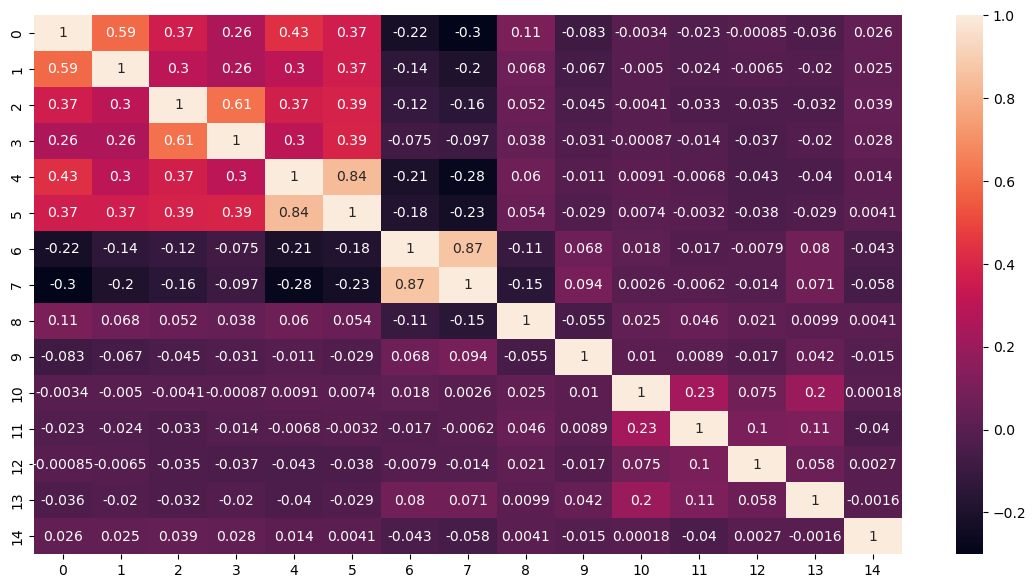

In [49]:

plt.figure(figsize=(14,7))

sns.heatmap(floating.corr(),annot=True)

plt.show()

In [50]:
obj.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [51]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

this = qt.fit_transform(this)
thist = qt.fit_transform(thist)


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
# for col in this.columns:
#     plt.figure(figsize=(14,4))
#     plt.subplot(121)
#     sns.kdeplot(this[col])

In [54]:

# from scipy import stats





# z_scores = np.abs(stats.zscore(thisnew))


# threshold = 2

# thisnew1 = np.where(z_scores > threshold, threshold, thisnew)


In [55]:

# from scipy import stats





# z_scores = np.abs(stats.zscore(thistnew))


# threshold = 2


# thistnew1 = np.where(z_scores > threshold, threshold, thistnew)




In [56]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

# scaled_data = sc.fit_transform(scaled_data7)

# scaled_datat = sc.fit_transform(scaled_datat7)


# scaled_d = pd.DataFrame(scaled_data)
# scaled_dt = pd.DataFrame(scaled_datat)




In [57]:
# for col in scaled_d.columns:
#     plt.figure(figsize=(14,4))
#     plt.subplot(121)
#     sns.kdeplot(scaled_d[col])

In [58]:

# from sklearn.preprocessing import PowerTransformer



# pt = PowerTransformer()


# scaled_d1 = pt.fit_transform(this)

# scaled_dt1 = pt.fit_transform(thist)


In [59]:
scaled_d1=pd.DataFrame(this)
scaled_dt1=pd.DataFrame(thist)

In [60]:
scaled_d1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,0.234493,-5.199338,-0.830726,1.489697,1.934489,-0.052716,0.058999,0.202098,-5.199338,-5.199338
1,-0.301855,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,1.011412,0.064027,-0.684186,1.214419,-5.199338,-0.052716,1.733071,-5.199338,-0.365531,-5.199338
2,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,0.901900,-5.199338,-0.293000,0.907926,-5.199338,-0.052716,0.058999,1.244778,-0.365531,-5.199338
3,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,1.181842,-5.199338,-1.514861,1.413322,-5.199338,-0.052716,0.058999,0.593940,-0.365531,-5.199338
4,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,0.279547,-5.199338,-2.256745,2.665932,-5.199338,-0.052716,0.058999,5.199338,-0.365531,-5.199338


In [61]:
# t1=SimpleImputer()
# scaled_d1=t1.fit_transform(scaled_d1)
# scaled_dt1=t1.fit_transform(scaled_dt1)

In [62]:

from sklearn.preprocessing import PowerTransformer



pt = PowerTransformer()


scaled_d1 = pt.fit_transform(scaled_d1)

scaled_dt1 = pt.transform(scaled_dt1)

In [63]:

scaled_d1 = scaler.fit_transform(scaled_d1)

scaled_dt1 = scaler.transform(scaled_dt1)


In [64]:
sc=StandardScaler()
scaled_d1=sc.fit_transform(scaled_d1)
scaled_dt1=sc.transform(scaled_dt1)

In [65]:
#  for col in scaled_d.columns:
#     plt.figure(figsize=(14,4))
#     plt.subplot(121)
#     sns.kdeplot(scaled_d1[col])

In [66]:
#   for col in scaled_d.columns:
#         plt.figure(figsize=(14,4))
#         plt.subplot(121)
#         sns.kdeplot(scaled_d1[col])

In [67]:

# from sklearn.preprocessing import PowerTransformer



# pt = PowerTransformer()


# scaled_d1 = pt.fit_transform(scaled_d1)

# scaled_dt1 = pt.transform(scaled_dt1)

In [68]:

scaled_d1=pd.DataFrame(scaled_d1)
scaled_dt1=pd.DataFrame(scaled_dt1)

In [69]:
# for col in scaled_d1.columns:
#     plt.figure(figsize=(14,4))
#     plt.subplot(121)
#     sns.kdeplot(scaled_d1[col])

In [70]:
# from sklearn.model_selection import train_test_split




# x_train, x_test, y_train1, y_test1 = train_test_split(scaled_d1,y_train, test_size=0.2, random_state=42
# )



In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

# shuffle the training data
xtrain, ytrain = shuffle(scaled_d1, y_train, random_state=1)


ready=VotingClassifier(estimators=[
   
    ('kn', KNeighborsClassifier(n_neighbors=50)),
   ('ad', AdaBoostClassifier(n_estimators=50, learning_rate=0.001, random_state=1))
    ],
    voting='soft')
ready.fit(xtrain, ytrain)
s = cross_val_score(ready, xtrain, ytrain, cv=15)

In [72]:
s


array([0.67382413, 0.6605317 , 0.66257669, 0.6605317 , 0.66564417,
       0.65746421, 0.66666667, 0.64928425, 0.66768916, 0.66768916,
       0.66257669, 0.65404299, 0.66018424, 0.66939611, 0.67758444])

In [73]:
s.mean()

0.6637124204348271

In [74]:
# gradboost_best_params = {'n_estimators': 50,
                        
#                    }

# adaboost_best_params = {'n_estimators': 75,
                        
#                        }



In [75]:
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier


In [76]:
# estimators = [
#     ('gradboost', GradientBoostingClassifier(**gradboost_best_params,
#                                              random_state= 2
#                                             )),
    
#     ('adaboost', AdaBoostClassifier(**adaboost_best_params,
#                                     random_state= 2,
#                                    ))
#     ]
                 

In [77]:
        
# ready= StackingClassifier(estimators=estimators, final_estimator=AdaBoostClassifier(**adaboost_best_params,random_state= 2 ))

In [78]:
# # from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import cross_val_score



#ready = AdaBoostClassifier(n_estimators=300, learning_rate=0.001, random_state=1)


# # ready.fit(x_train, y_train1)


In [79]:
# from xgboost import XGBClassifier
# ready= XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


In [80]:
# from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import  VotingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import cross_val_score
# ready=VotingClassifier(estimators=[
#     ('lr', LogisticRegression(solver='liblinear',penalty='l1', random_state=6) ),
#     ('gb', XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic') )
   
#     ],
#     voting='soft')


In [81]:
# ready.fit(x_train,y_train1)

In [82]:
# y_pred1 = ready.predict(x_test)
# y_pred1 = y_pred1.astype(bool)

In [83]:
# from xgboost import XGBClassifier
# mod = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.01,objective='binary:logistic')
# mod.fit(x_train,y_train1)

In [84]:
# y_pred1 = mod.predict(x_test)
# y_pred1 = y_pred1.astype(bool)

In [85]:
# from sklearn.model_selection import cross_val_score


# scores = cross_val_score(ready,scaled_d1,y_train , cv=5) 


# print("Average score:", scores.mean())
# print("Standard deviation:", scores.std())


In [86]:
# scores

In [87]:
ready.fit(scaled_d1, y_train)

VotingClassifier(estimators=[('kn', KNeighborsClassifier(n_neighbors=50)),
                             ('ad',
                              AdaBoostClassifier(learning_rate=0.001,
                                                 random_state=1))],
                 voting='soft')

In [88]:
y_pred = ready.predict(scaled_dt1)
y_pred = y_pred.astype(bool)
y_pred             

array([False, False, False, ..., False, False, False])

In [89]:
#train_data.shape


In [90]:
#train_data.isnull().sum()

In [91]:
#sns.boxplot(train_data.HomePage)

In [92]:
#train_data.isnull().sum()

In [93]:
#sns.displot(train_data.HomePage_Duration)
#sns.displot(train_data.LandingPage)
#sns.displot(train_data.LandingPage_Duration)
    
#sns.displot(train_data.ProductDescriptionPage)
#sns.displot(train_data.ProductDescriptionPage_Duration)


In [94]:
# train_data['HomePage'].fillna(train_data['HomePage'].median(),inplace=True)
# train_data['HomePage_Duration'].fillna(train_data['HomePage_Duration'].median(),inplace=True)
# train_data['LandingPage'].fillna(train_data['LandingPage'].median(),inplace=True)
# train_data['LandingPage_Duration'].fillna(train_data['LandingPage_Duration'].median(),inplace=True)
# train_data['ProductDescriptionPage'].fillna(train_data['ProductDescriptionPage'].median(),inplace=True)
# train_data['ProductDescriptionPage_Duration'].fillna(train_data['ProductDescriptionPage_Duration'].median(),inplace=True)
# train_data['GoogleMetric:Bounce Rates'].fillna(train_data['GoogleMetric:Bounce Rates'].median(),inplace=True)
# train_data['GoogleMetric:Exit Rates'].fillna(train_data['GoogleMetric:Exit Rates'].median(),inplace=True)
# train_data['GoogleMetric:Page Values'].fillna(train_data['GoogleMetric:Page Values'].median(),inplace=True)
# train_data['OS'].fillna(train_data['OS'].median(),inplace=True)
# train_data['SearchEngine'].fillna(train_data['SearchEngine'].median(),inplace=True)
# train_data['Type of Traffic'].fillna(train_data['Type of Traffic'].median(),inplace=True)
# train_data['WeekendPurchase'].fillna(train_data['WeekendPurchase'].median(),inplace=True)
# train_data['Zone'].fillna(train_data['Zone'].median(),inplace=True)
# train_data['SeasonalPurchase'].fillna(train_data['SeasonalPurchase'].median(),inplace=True)


In [95]:
#train_data.info()

In [96]:
#train_data.isnull().sum()

In [97]:
#train_data['Month_SeasonalPurchase'].value_counts()

In [98]:
#from sklearn.preprocessing import LabelEncoder

In [99]:
#le=LabelEncoder()


In [100]:
# labels =le.fit_transform(train_data.Month_SeasonalPurchase)
# labels1 =le.fit_transform(train_data.CustomerType)
# labels2 =le.fit_transform(train_data.Gender)
# labels3 =le.fit_transform(train_data['Cookies Setting'])
# labels4 =le.fit_transform(train_data.Education)
# labels5 =le.fit_transform(train_data['Marital Status'])


In [101]:
# train_data['Month_SeasonalPurchase'] = labels
# train_data['CustomerType'] = labels1
# train_data['Gender'] = labels2
# train_data['Cookies Setting'] = labels3
# train_data['Education'] = labels4
# train_data['Marital Status'] = labels5

In [102]:
# train_data['Month_SeasonalPurchase'].fillna(train_data['Month_SeasonalPurchase'].median(),inplace=True)
# train_data['CustomerType'].fillna(train_data['CustomerType'].median(),inplace=True)
# train_data['Gender'].fillna(train_data['Gender'].median(),inplace=True)
# train_data['Cookies Setting'].fillna(train_data['Cookies Setting'].median(),inplace=True)
# train_data['Education'].fillna(train_data['Education'].median(),inplace=True)
# train_data['Marital Status'].fillna(train_data['Marital Status'].median(),inplace=True)

In [103]:
# train_data.info()

In [104]:
# labels =le.fit_transform(test_data.Month_SeasonalPurchase)
# labels1 =le.fit_transform(test_data.CustomerType)
# labels2 =le.fit_transform(test_data.Gender)
# labels3 =le.fit_transform(test_data['Cookies Setting'])
# labels4 =le.fit_transform(test_data.Education)
# labels5 =le.fit_transform(test_data['Marital Status'])


In [105]:
# test_data['Month_SeasonalPurchase'] = labels
# test_data['CustomerType'] = labels1
# test_data['Gender'] = labels2
# test_data['Cookies Setting'] = labels3
# test_data['Education'] = labels4
# test_data['Marital Status'] = labels5

In [106]:
# test_data['Month_SeasonalPurchase'].fillna(train_data['Month_SeasonalPurchase'].median(),inplace=True)
# test_data['CustomerType'].fillna(train_data['CustomerType'].median(),inplace=True)
# test_data['Gender'].fillna(train_data['Gender'].median(),inplace=True)
# test_data['Cookies Setting'].fillna(train_data['Cookies Setting'].median(),inplace=True)
# test_data['Education'].fillna(train_data['Education'].median(),inplace=True)
# test_data['Marital Status'].fillna(train_data['Marital Status'].median(),inplace=True)

In [107]:
# test_data['HomePage'].fillna(train_data['HomePage'].median(),inplace=True)
# test_data['HomePage_Duration'].fillna(train_data['HomePage_Duration'].median(),inplace=True)
# test_data['LandingPage'].fillna(train_data['LandingPage'].median(),inplace=True)
# test_data['LandingPage_Duration'].fillna(train_data['LandingPage_Duration'].median(),inplace=True)
# test_data['ProductDescriptionPage'].fillna(train_data['ProductDescriptionPage'].median(),inplace=True)
# test_data['ProductDescriptionPage_Duration'].fillna(train_data['ProductDescriptionPage_Duration'].median(),inplace=True)
# test_data['GoogleMetric:Bounce Rates'].fillna(train_data['GoogleMetric:Bounce Rates'].median(),inplace=True)
# test_data['GoogleMetric:Exit Rates'].fillna(train_data['GoogleMetric:Exit Rates'].median(),inplace=True)
# test_data['GoogleMetric:Page Values'].fillna(train_data['GoogleMetric:Page Values'].median(),inplace=True)
# test_data['OS'].fillna(train_data['OS'].median(),inplace=True)
# test_data['SearchEngine'].fillna(train_data['SearchEngine'].median(),inplace=True)
# test_data['Type of Traffic'].fillna(train_data['Type of Traffic'].median(),inplace=True)
# test_data['WeekendPurchase'].fillna(train_data['WeekendPurchase'].median(),inplace=True)
# test_data['Zone'].fillna(train_data['Zone'].median(),inplace=True)
# test_data['SeasonalPurchase'].fillna(train_data['SeasonalPurchase'].median(),inplace=True)


In [108]:
# test_data.isnull().sum()

In [109]:
# l=pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
# l.head()

In [110]:
# labels00 =le.fit_transform(train_data['Made_Purchase'])
# train_data['Made_Purchase'] = labels00

In [111]:
# train_data.shape

In [112]:
# from sklearn.preprocessing import StandardScaler

In [113]:
# sc=StandardScaler()
# sc.fit_transform(train_data)
# sc.fit_transform(test_data)



In [114]:

# #



In [115]:
# y_pred = ready.predict(scaled_datat)
# y_pred = y_pred.astype(bool)
# y_pred             

In [116]:
# from xgboost import XGBClassifier
# bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst.fit(train_data, y_train)

In [117]:
# y_pred = bst.predict(test_data)
# y_pred = y_pred.astype(bool)
# y_pred

In [118]:
# ready.fit(train_data, y_train)
# y_pred = ready.predict(test_data)
# y_pred = y_pred.astype(bool)
# y_pred

In [119]:
submission = pd.DataFrame({'id': range(len(y_pred)), 'Made_Purchase': y_pred})
submission.to_csv('submission.csv', index=False)

In [120]:
submission.head()

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
